<a href="https://colab.research.google.com/github/odbrown-ship-it/Test/blob/main/Copy_of_Data_Science_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.listdir('/content')

['.config',
 'survey_results_public.csv',
 'analyze_cloud_salaries.py',
 'sample_data']

In [ ]:
df = pd.read_csv('/content/survey_results_public.csv', usecols=[
    'PlatformHaveWorkedWith',
    'ConvertedCompYearly',
    'YearsCode'
])

In [ ]:
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

df = df.dropna(subset=['ConvertedCompYearly', 'YearsCode'])

In [ ]:
df = df[(df['YearsCode'] >= 5) & (df['YearsCode'] <= 10)]

In [ ]:
df['AWS'] = df['PlatformHaveWorkedWith'].str.contains('aws', case=False, na=False)
df['Azure'] = df['PlatformHaveWorkedWith'].str.contains('azure', case=False, na=False)
df['GCP'] = df['PlatformHaveWorkedWith'].str.contains('gcp|google cloud', case=False, na=False)

In [ ]:
aws_salaries = df.loc[df['AWS'], 'ConvertedCompYearly']
azure_salaries = df.loc[df['Azure'], 'ConvertedCompYearly']
gcp_salaries = df.loc[df['GCP'], 'ConvertedCompYearly']

In [ ]:
median_salaries = {
    'AWS': aws_salaries.median(),
    'Azure': azure_salaries.median(),
    'GCP': gcp_salaries.median()
}

mean_salaries = {
    'AWS': aws_salaries.mean(),
    'Azure': azure_salaries.mean(),
    'GCP': gcp_salaries.mean()
}

adoption_rates = {
    'AWS': df['AWS'].mean() * 100,
    'Azure': df['Azure'].mean() * 100,
    'GCP': df['GCP'].mean() * 100
}

highest_median_platform = max(median_salaries, key=median_salaries.get)
highest_mean_platform = max(mean_salaries, key=mean_salaries.get)


In [ ]:
anova_stat, anova_p = stats.f_oneway(
    aws_salaries.dropna(),
    azure_salaries.dropna(),
    gcp_salaries.dropna()
)

kw_stat, kw_p = stats.kruskal(
    aws_salaries.dropna(),
    azure_salaries.dropna(),
    gcp_salaries.dropna()
)


In [ ]:
median_salaries = {
    'AWS': df.loc[df['AWS'], 'ConvertedCompYearly'].median(),
    'Azure': df.loc[df['Azure'], 'ConvertedCompYearly'].median(),
    'GCP': df.loc[df['GCP'], 'ConvertedCompYearly'].median(),
}

In [ ]:
highest_platform = max(median_salaries, key=median_salaries.get)

median_salaries, highest_platform

({'AWS': 92616.5, 'Azure': 84691.0, 'GCP': 81210.0}, 'AWS')

In [ ]:
print("\n=== CLOUD PLATFORM SALARY ANALYSIS (5–10 years experience) ===")
print("\n--- Median Salaries ---")
for k, v in median_salaries.items():
    print(f"{k}: ${v:,.0f}")

print("\n--- Mean Salaries ---")
for k, v in mean_salaries.items():
    print(f"{k}: ${v:,.0f}")

print("\n--- Adoption Rates (Market Share) ---")
for k, v in adoption_rates.items():
    print(f"{k}: {v:.2f}%")

print(f"\nHighest Median Salary: {highest_median_platform}")
print(f"Highest Average Salary: {highest_mean_platform}")

print("\n--- Statistical Tests ---")
print(f"ANOVA F-statistic: {anova_stat:.4f}, p-value: {anova_p:.6f}")
print(f"Kruskal–Wallis H-statistic: {kw_stat:.4f}, p-value: {kw_p:.6f}")

if anova_p < 0.05:
    print("\n➡️ Result: Statistically significant salary differences exist between cloud platforms.")
else:
    print("\n➡️ Result: No statistically significant salary differences detected between platforms.")


=== CLOUD PLATFORM SALARY ANALYSIS (5–10 years experience) ===

--- Median Salaries ---
AWS: $55,264
Azure: $55,687
GCP: $45,478

--- Mean Salaries ---
AWS: $72,814
Azure: $68,815
GCP: $66,906

--- Adoption Rates (Market Share) ---
AWS: 30.64%
Azure: 17.89%
GCP: 18.80%

Highest Median Salary: Azure
Highest Average Salary: AWS

--- Statistical Tests ---
ANOVA F-statistic: 0.5093, p-value: 0.600952
Kruskal–Wallis H-statistic: 17.8086, p-value: 0.000136

➡️ Result: No statistically significant salary differences detected between platforms.


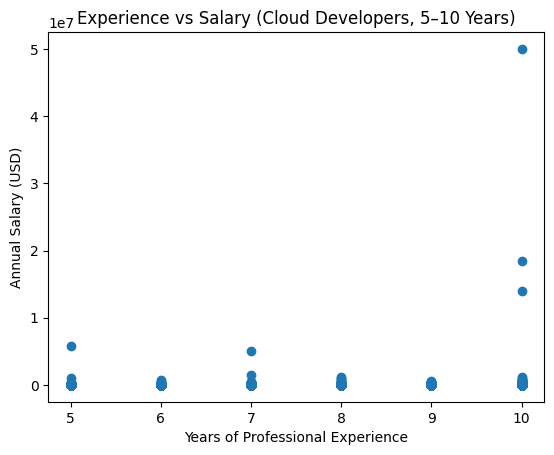

In [ ]:
plt.scatter(df['YearsCode'], df['ConvertedCompYearly'])
plt.xlabel('Years of Professional Experience')
plt.ylabel('Annual Salary (USD)')
plt.title('Experience vs Salary (Cloud Developers, 5–10 Years)')
plt.show()

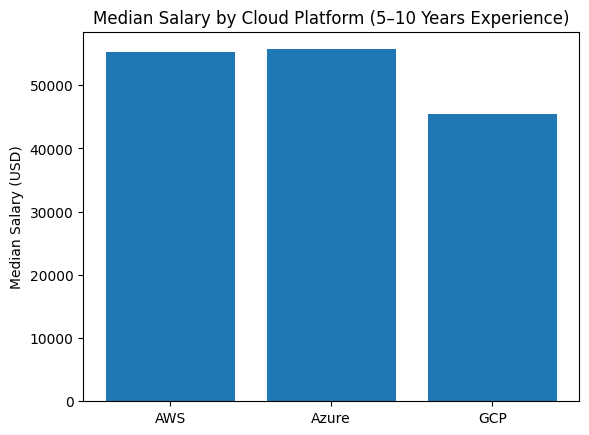

In [ ]:
import numpy as np

medians = {
    'AWS': df.loc[df['AWS'], 'ConvertedCompYearly'].median(),
    'Azure': df.loc[df['Azure'], 'ConvertedCompYearly'].median(),
    'GCP': df.loc[df['GCP'], 'ConvertedCompYearly'].median(),
}

labels = list(medians.keys())
values = list(medians.values())

plt.bar(labels, values)
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary by Cloud Platform (5–10 Years Experience)')
plt.show()

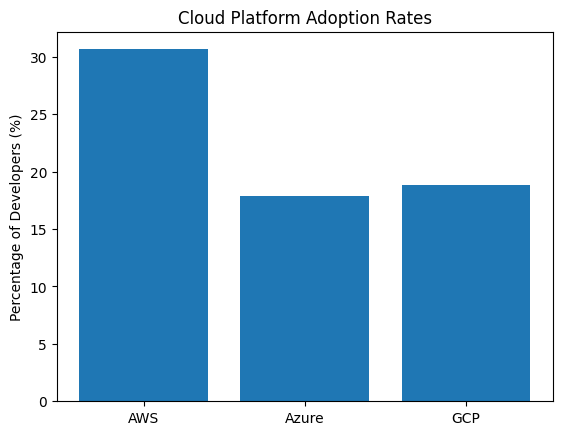

In [ ]:
adoption = {
    'AWS': df['AWS'].mean() * 100,
    'Azure': df['Azure'].mean() * 100,
    'GCP': df['GCP'].mean() * 100
}

labels = list(adoption.keys())
values = list(adoption.values())

plt.bar(labels, values)
plt.ylabel('Percentage of Developers (%)')
plt.title('Cloud Platform Adoption Rates')
plt.show()

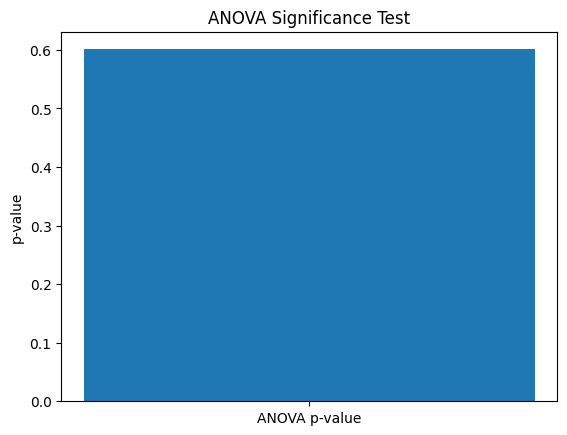

ANOVA p-value: 0.6009524569016399


In [ ]:
import scipy.stats as stats

aws = df.loc[df['AWS'], 'ConvertedCompYearly']
azure = df.loc[df['Azure'], 'ConvertedCompYearly']
gcp = df.loc[df['GCP'], 'ConvertedCompYearly']

fstat, pval = stats.f_oneway(aws, azure, gcp)

plt.bar(['ANOVA p-value'], [pval])
plt.title('ANOVA Significance Test')
plt.ylabel('p-value')
plt.show()

print("ANOVA p-value:", pval)

/tmp/ipython-input-4018130581.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_salary_by_exp = df.groupby('ExperienceBracket')['ConvertedCompYearly'].mean()


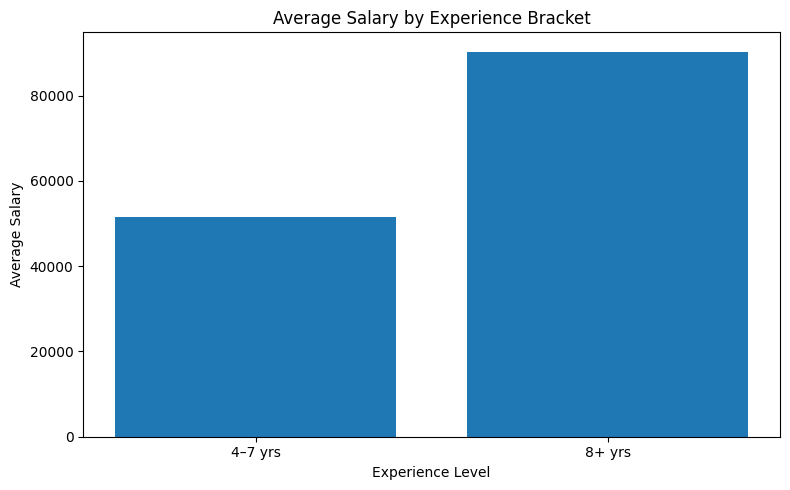

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

bins = [0, 3, 7, 50]
labels = ['0–3 yrs', '4–7 yrs', '8+ yrs']

df['ExperienceBracket'] = pd.cut(df['YearsCode'], bins=bins, labels=labels)

mean_salary_by_exp = df.groupby('ExperienceBracket')['ConvertedCompYearly'].mean()

plt.figure(figsize=(8, 5))
plt.bar(mean_salary_by_exp.index.astype(str), mean_salary_by_exp.values)
plt.title("Average Salary by Experience Bracket")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

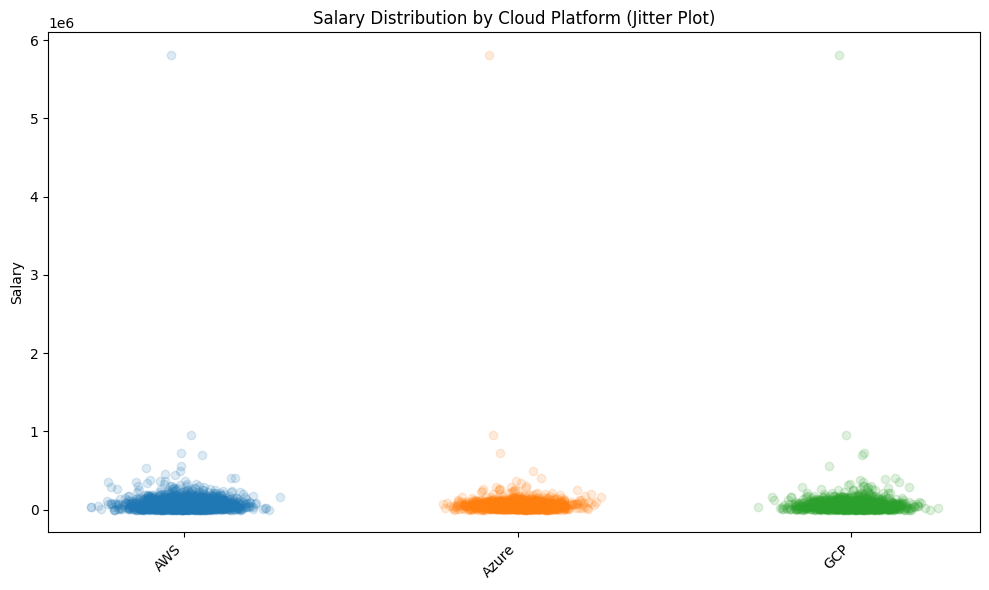

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create platform_salary_exploded DataFrame
exploded_data = []
for index, row in df.iterrows():
    if row['AWS']:
        exploded_data.append({'Platform': 'AWS', 'ConvertedCompYearly': row['ConvertedCompYearly']})
    if row['Azure']:
        exploded_data.append({'Platform': 'Azure', 'ConvertedCompYearly': row['ConvertedCompYearly']})
    if row['GCP']:
        exploded_data.append({'Platform': 'GCP', 'ConvertedCompYearly': row['ConvertedCompYearly']})

platform_salary_exploded = pd.DataFrame(exploded_data)
platform_salary_exploded['ConvertedCompYearly'] = pd.to_numeric(platform_salary_exploded['ConvertedCompYearly'], errors='coerce')
platform_salary_exploded = platform_salary_exploded.dropna(subset=['ConvertedCompYearly'])

platforms = platform_salary_exploded.groupby('Platform')['ConvertedCompYearly'].apply(list)

plt.figure(figsize=(10,6))

for i, (platform, salaries) in enumerate(platforms.items()):
    x = np.random.normal(i, 0.08, size=len(salaries))  # jitter
    plt.scatter(x, salaries, alpha=0.15)

plt.xticks(range(len(platforms)), platforms.index, rotation=45, ha='right')
plt.ylabel("Salary")
plt.title("Salary Distribution by Cloud Platform (Jitter Plot)")
plt.tight_layout()
plt.show()


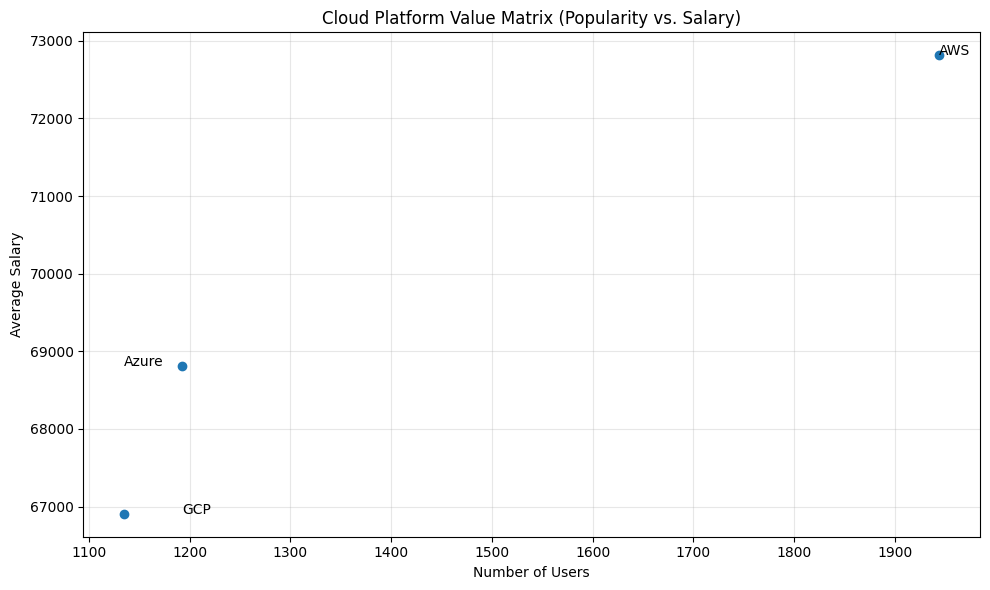

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

platform_counts = platform_salary_exploded['Platform'].value_counts()
platform_means = platform_salary_exploded.groupby('Platform')['ConvertedCompYearly'].mean()

plt.figure(figsize=(10,6))

plt.scatter(platform_counts, platform_means)

for p in platform_counts.index:
    plt.text(platform_counts[p], platform_means[p], p)

plt.xlabel("Number of Users")
plt.ylabel("Average Salary")
plt.title("Cloud Platform Value Matrix (Popularity vs. Salary)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

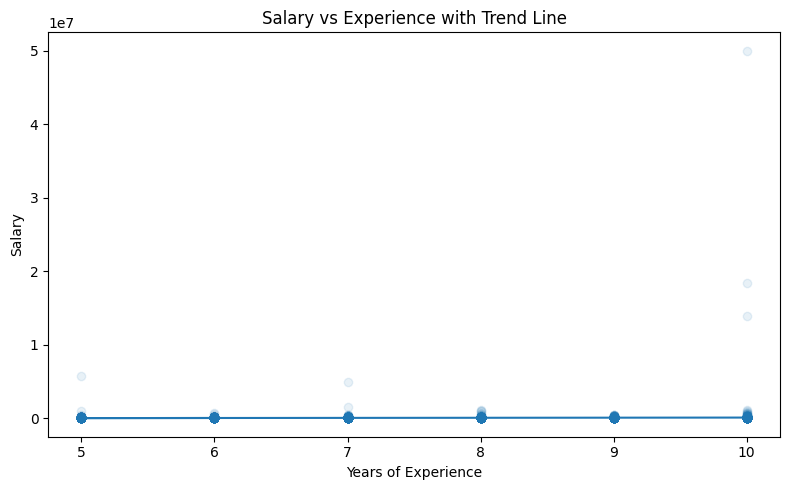

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = df['YearsCode']
y = df['ConvertedCompYearly']

mask = x.notna() & y.notna()
x, y = x[mask], y[mask]

m, b = np.polyfit(x, y, 1)  # linear fit

plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.1)
plt.plot(x, m*x + b)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience with Trend Line")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("survey_results_public.csv")

/tmp/ipython-input-4024409933.py:3: DtypeWarning: Columns (56,74,92,97,98,105,109,110,132,162,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("survey_results_public.csv")


In [ ]:
df = df[df["Country"] == "United States of America"]

In [ ]:
df = df[df["ConvertedCompYearly"].notna()]

In [ ]:
df = df[df["Employment"] == "Employed"]


In [ ]:
df = df[(df["ConvertedCompYearly"] >= 30000) & (df["ConvertedCompYearly"] <= 500000)]

In [ ]:
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors="coerce")
df = df[(df["YearsCode"] >= 1) & (df["YearsCode"] <= 30)]

In [ ]:
print("Number of usable responses:", len(df))


Number of usable responses: 3606


In [ ]:
df.to_csv("survey USA cleaned.csv", index=False)

In [ ]:
print("Saved as survey USA cleaned.csv")

Saved as survey USA cleaned.csv


In [ ]:
print("\n=== CLOUD PLATFORM SALARY ANALYSIS (5–10 years experience) ===")
print("\n--- Median Salaries ---")
for k, v in median_salaries.items():
    print(f"{k}: ${v:,.0f}")

print("\n--- Mean Salaries ---")
for k, v in mean_salaries.items():
    print(f"{k}: ${v:,.0f}")

print("\n--- Adoption Rates (Market Share) ---")
for k, v in adoption_rates.items():
    print(f"{k}: {v:.2f}%")

print(f"\nHighest Median Salary: {highest_median_platform}")
print(f"Highest Average Salary: {highest_mean_platform}")

print("\n--- Statistical Tests ---")
print(f"ANOVA F-statistic: {anova_stat:.4f}, p-value: {anova_p:.6f}")
print(f"Kruskal–Wallis H-statistic: {kw_stat:.4f}, p-value: {kw_p:.6f}")

if anova_p < 0.05:
    print("\n➡️ Result: Statistically significant salary differences exist between cloud platforms.")
else:
    print("\n➡️ Result: No statistically significant salary differences detected between platforms.")


=== CLOUD PLATFORM SALARY ANALYSIS (5–10 years experience) ===

--- Median Salaries ---
AWS: $55,264
Azure: $55,687
GCP: $45,478

--- Mean Salaries ---
AWS: $72,814
Azure: $68,815
GCP: $66,906

--- Adoption Rates (Market Share) ---
AWS: 30.64%
Azure: 17.89%
GCP: 18.80%

Highest Median Salary: Azure
Highest Average Salary: AWS

--- Statistical Tests ---
ANOVA F-statistic: 0.5093, p-value: 0.600952
Kruskal–Wallis H-statistic: 17.8086, p-value: 0.000136

➡️ Result: No statistically significant salary differences detected between platforms.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df.to_csv("/content/drive/MyDrive/survey USA cleaned.csv", index=False)
print("Saved to Google Drive: /content/drive/MyDrive/survey USA cleaned.csv")


Mounted at /content/drive
Saved to Google Drive: /content/drive/MyDrive/survey USA cleaned.csv


In [ ]:
df.describe(include='all')

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat,YearsCodePro
count,3606.000000,3606,3606,3602,3606,3420,3576.000000,3606,2574,3603,...,54,236,32,859,97,3257,2742,3606.000000,2989.000000,3606.000000
unique,NaN,6,7,8,1,52,NaN,3,761,5,...,52,57,30,229,60,328,2643,NaN,NaN,NaN
top,NaN,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,NaN,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools req...",...,GitHub Copilot,Sentry,Datadog,ChatGPT;GitHub Copilot,Cursor,When I don’t trust AI’s answers;When I want to...,Problem solving,NaN,NaN,NaN
freq,NaN,3118,1451,2099,3606,1559,NaN,2548,56,1467,...,2,44,3,61,13,477,19,NaN,NaN,NaN
mean,21334.094565,NaN,NaN,NaN,NaN,NaN,12.732103,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160702.786467,7.277685,16.400166
std,14431.534079,NaN,NaN,NaN,NaN,NaN,7.671678,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76658.349311,1.999960,7.537453
min,23.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.000000,0.000000,1.000000
25%,8234.000000,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106000.000000,6.000000,10.000000
50%,19102.000000,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000.000000,8.000000,15.000000
75%,34815.000000,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200000.000000,9.000000,22.000000


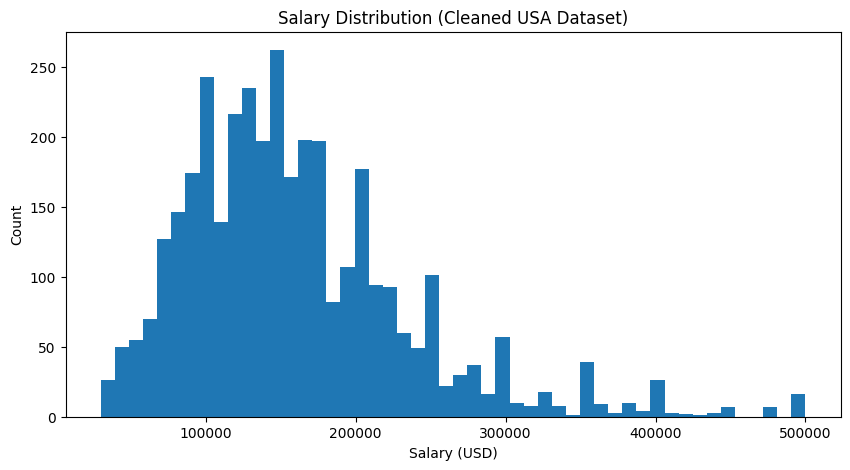

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df["ConvertedCompYearly"], bins=50)
plt.title("Salary Distribution (Cleaned USA Dataset)")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.show()


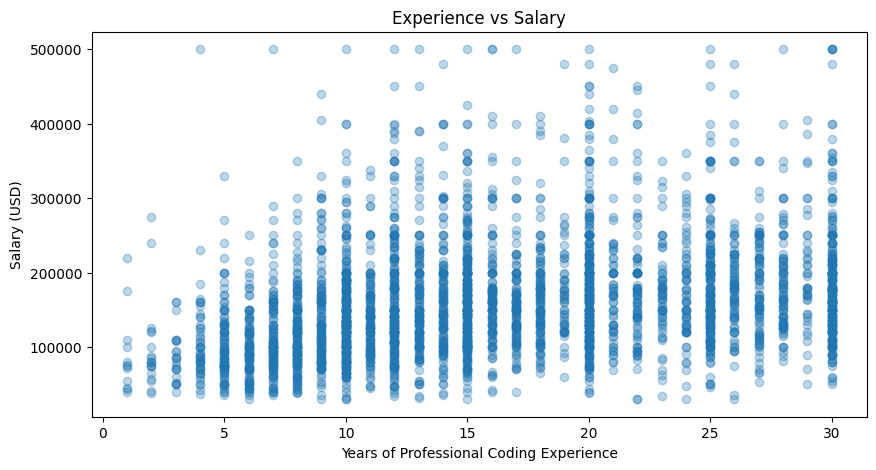

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df["YearsCodePro"], df["ConvertedCompYearly"], alpha=0.3)
plt.title("Experience vs Salary")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Salary (USD)")
plt.show()

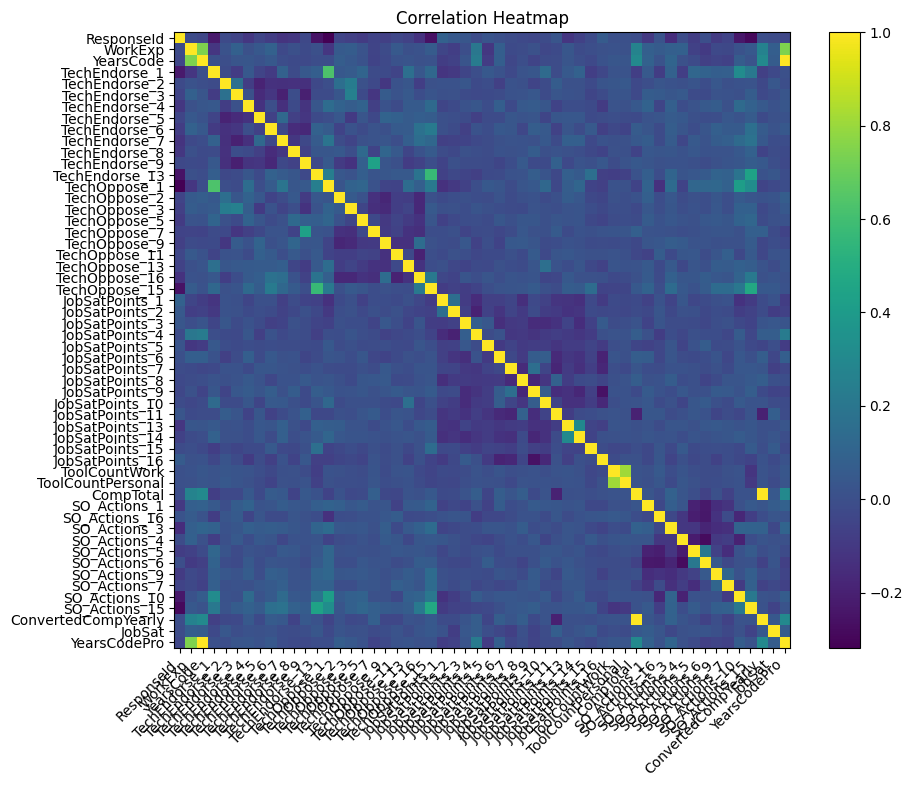

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='viridis', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

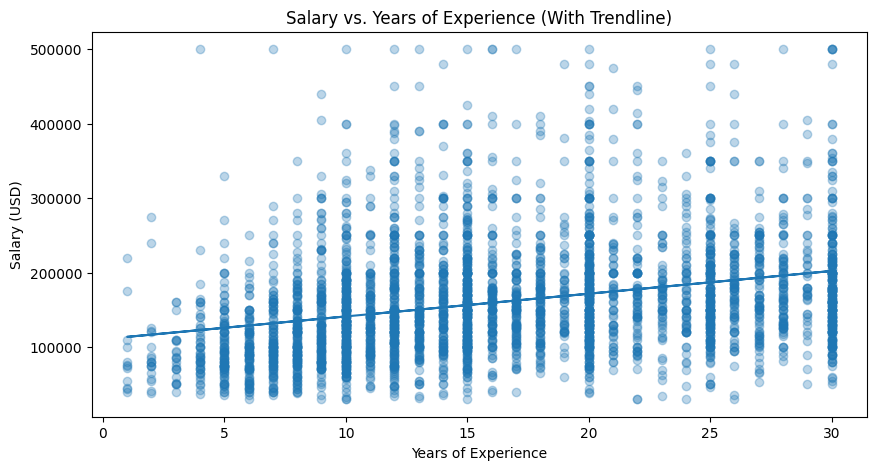

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = df["YearsCode"]
y = df["ConvertedCompYearly"]

plt.figure(figsize=(10,5))
plt.scatter(x, y, alpha=0.3)

# Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))

plt.title("Salary vs. Years of Experience (With Trendline)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")
plt.show()

/tmp/ipython-input-2393403752.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salary_groups, labels=labels)


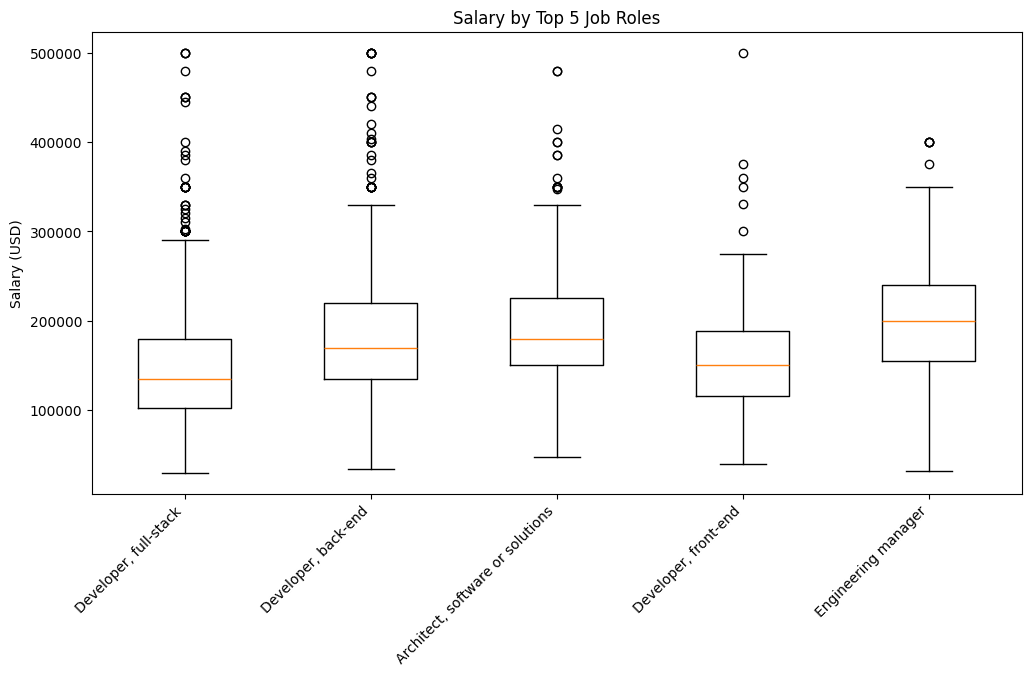

In [ ]:
if "DevType" in df.columns:
    roles = df["DevType"].dropna().str.split(";")
    all_roles = [r.strip() for sublist in roles for r in sublist]
    top5 = pd.Series(all_roles).value_counts().head(5).index.tolist()

    plt.figure(figsize=(12,6))

    salary_groups = []
    labels = []

    for role in top5:
        mask = df["DevType"].fillna("").str.contains(role)
        salary_groups.append(df[mask]["ConvertedCompYearly"].dropna())
        labels.append(role)

    plt.boxplot(salary_groups, labels=labels)
    plt.title("Salary by Top 5 Job Roles")
    plt.ylabel("Salary (USD)")
    plt.xticks(rotation=45, ha='right')
    plt.show()